In [1]:
module qt
    include("QuantumTrajectories.jl")
end

macro show(matrix)
   :(show(stdout, "text/plain", $(matrix))) 
end

@show (macro with 1 method)

In [2]:
using LinearAlgebra
using Plots
using LaTeXStrings
using NumericalIntegration

In [3]:
# The plot settings
xlabs = ([210.0, 230.0, 250.0], [L"10", L"30", L"50"])
cplot = "#182e85"
cmeas = "#1a1c24"

"#1a1c24"

In [36]:
# The plot parameters that are same for all simulations
t1 = 1.0
t2 = 0.5
# The bath is turned off in this example by setting very small gamma
temperature = 0.1
γ = 1e-10
taum = 200.0
dt = 0.01
T=30000
N=10

10

In [37]:
# The inversion-symmetric potential
V=0.0

# The measured observable
ϕ=0.0
θ=π/4


ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] = 2*i*diagm([1.0, 1.0]).+block/2.0
end
θobs = qt.observable([θmat], (1.0, ), qt.make)

Q = qt.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)]

30000-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -0.1220594074084959
 -0.12354548110582214
 -0.1250218197761943
 -0.1264873943320342
 -0.12794116982622683
 -0.12938210620499696
 -0.1308091590679444
 -0.1322212804346165
 -0.13361741951705725
 -0.1349965234977031
 -0.13635753831215636
 -0.13769940943608508

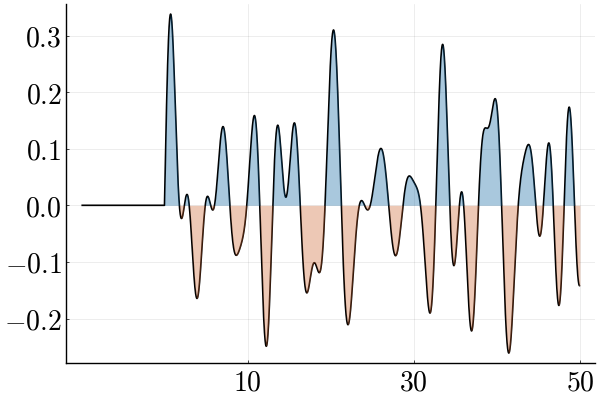

In [38]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]



plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [39]:
Plots.savefig("images/dynamics_example3/obs_a.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_a.png"

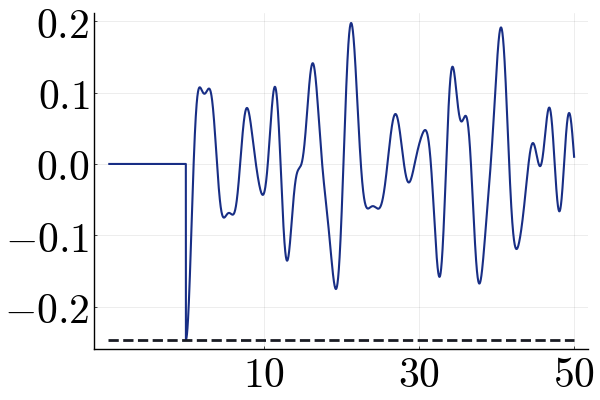

In [40]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=1.5, label=false, color=cplot, xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color=cmeas, linestyle=:dash)

In [41]:
Plots.savefig("images/dynamics_example3/obs_a_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_a_integrated.png"

In [42]:
# The inversion-symmetric potential
V=0.0

# The measured observable
ϕ=π/4
θ=acos(1/sqrt(3))


ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] =  2*i*diagm([1.0, 1.0]).+block/2.0
end

θobs = qt.observable([θmat], (1.0, ), qt.make)

Q = qt.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)]

30000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 8.045365126342285
 8.045962031931692
 8.04658993247584
 8.047249566679563
 8.04794165950763
 8.048666921532037
 8.049426048287822
 8.050219719637893
 8.051048599147393
 8.051913333468084
 8.05281455173332
 8.053752864964002

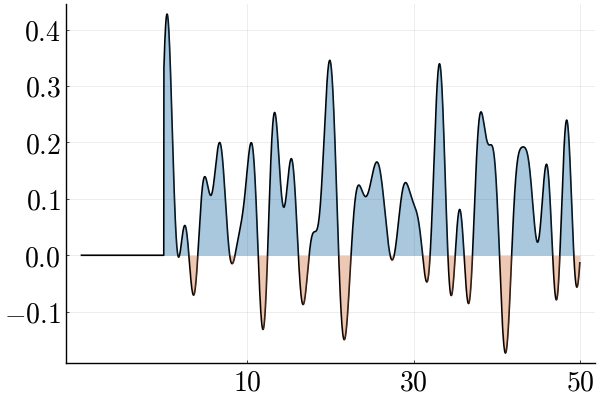

In [43]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [44]:
Plots.savefig("images/dynamics_example3/obs_b.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_b.png"

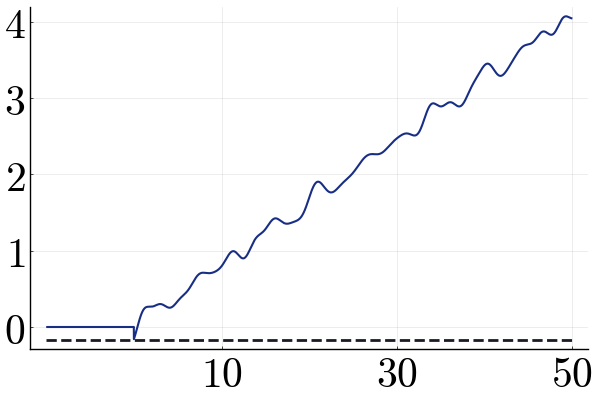

In [45]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=1.5, label=false, color=cplot, xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color=cmeas, linestyle=:dash)

In [46]:
Plots.savefig("images/dynamics_example3/obs_b_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_b_integrated.png"

In [47]:
# The inversion-breaking potential
V=3.0

# The measured observable is position
ϕ=0.0
θ=0.0

ρ0, H, x, J, λ = dm.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = dm.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] =  2*i*diagm([1.0, 1.0]).+block/2.0
end

θobs = dm.observable([θmat], (1.0, ), dm.make)

Q = dm.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

ts, cur  = dm.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)

LoadError: UndefVarError: dm not defined

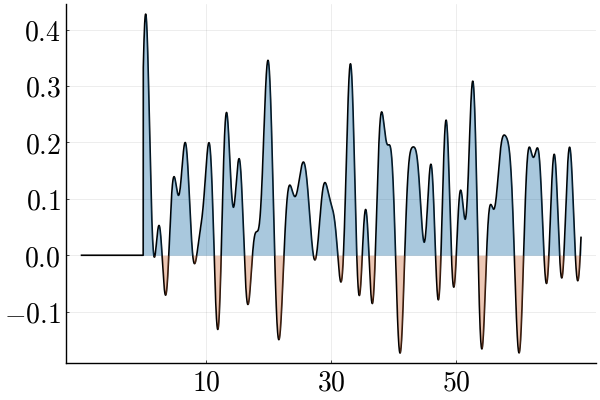

In [48]:
start = 19000
final = 27000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [49]:
println(Qexp)

-0.16398513812274831


In [50]:
Plots.savefig("images/dynamics_example3/obs_c.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_c.png"

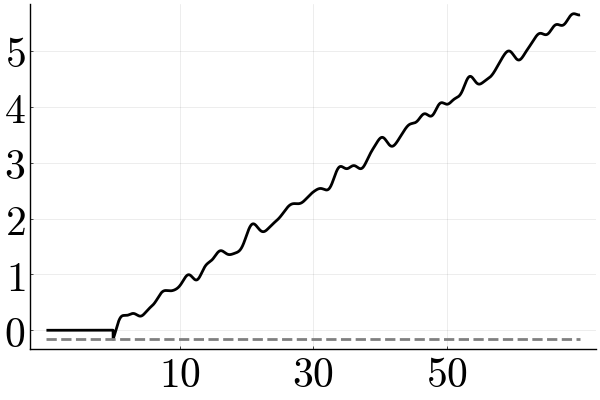

In [51]:
start = 19000
final = 27000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=2.0, label=false, color="black", xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color="gray", linestyle=:dash)

In [52]:
Plots.savefig("images/dynamics_example3/obs_c_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_c_integrated.png"

In [53]:
# The inversion-breaking potential
V=3.0

# The measured observable
ϕ=0.0
θ=π/2

ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] =  2*i*diagm([1.0, 1.0]).+block/2.0
end
θobs = qt.observable([θmat], (1.0, ), qt.make)

Q = qt.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)]

30000-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -0.2660455931509902
 -0.2643928734224747
 -0.262657317339525
 -0.2608407303039785
 -0.25894503091296744
 -0.2569722488347263
 -0.2549245225255703
 -0.2528040967908602
 -0.2506133201929096
 -0.24835464230911514
 -0.24603061084354394
 -0.243643868595865

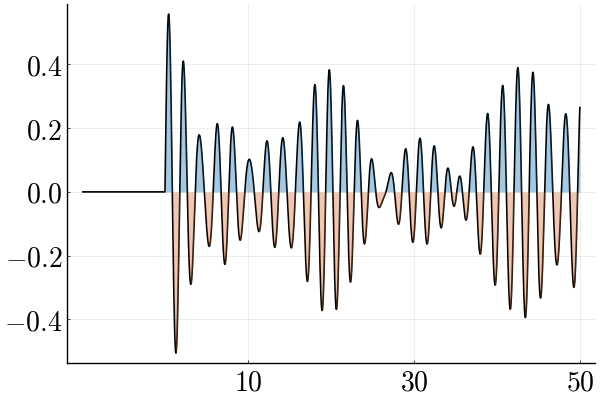

In [54]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [55]:
Plots.savefig("images/dynamics_example3/obs_d.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_d.png"

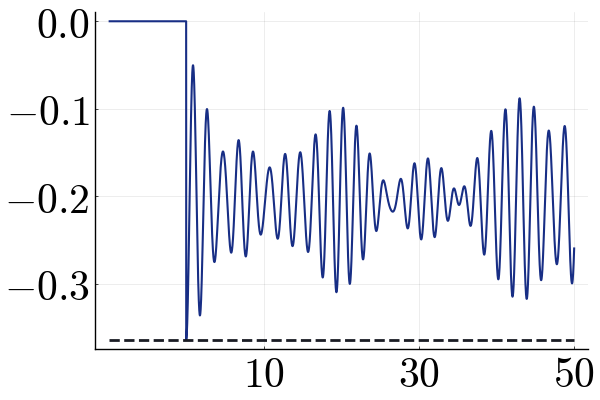

In [56]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=1.5, label=false, color=cplot, xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color=cmeas, linestyle=:dash)

In [57]:
Plots.savefig("images/dynamics_example3/obs_d_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_d_integrated.png"

In [58]:
# The inversion-breaking potential
V=3.0

# The measured observable is the bond current
ϕ=π/2
θ=π/2

ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] =  2*i*diagm([1.0, 1.0]).+block/2.0
end

θobs = qt.observable([θmat], (1.0, ), qt.make)

Q = qt.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)]

30000-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497
 -0.36381928725130497

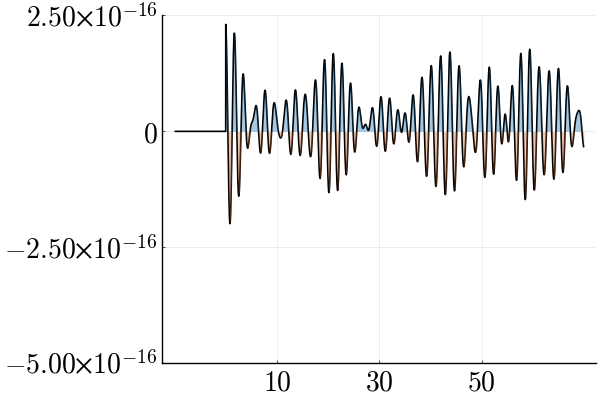

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


In [59]:
start = 19000
final = 27000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [60]:
Plots.savefig("images/dynamics_example3/obs_e.png")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_e.png"

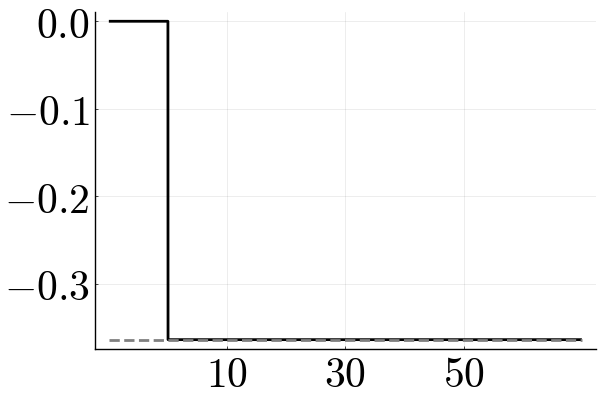

In [61]:
start = 19000
final = 27000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=2.0, label=false, color="black", xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color="gray", linestyle=:dash)

In [62]:
Plots.savefig("images/dynamics_example3/obs_e_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_e_integrated.png"

In [63]:
# The inversion-breaking potential
V=3.0

# The measured observable
ϕ=π/2
θ=3π/4

ρ0, H, x, J, λ = qt.build_objects_2band_position(-t1, -t2, V, γ, N, decay="T", temp=temperature, pos=false)

U2 = qt.unitary2R(π/2, π/2+ϕ, θ)
block = U2*[1.0+0.0im 0.0; 0.0 0.0]*U2'
θmat = zeros(ComplexF64, 2*N, 2*N)
for i in 1:2:2*N-1
    θmat[i:i+1, i:i+1] =  2*i*diagm([1.0, 1.0]).+block/2.0
end

θobs = qt.observable([θmat], (1.0, ), qt.make)

Q = qt.measurement_charge_displacement(θ, ϕ, N)
Qϵ = H.vectors'*Q*H.vectors
Qexp = real(tr(Qϵ*ρ0.matrix))

n = round(Int, taum/dt)
ts, cur  = qt.ratchet_measure_int!(ρ0, dt, T*dt, n, H, θobs, J, λ, transform=false)
cur_int = [integrate(ts[1: i], cur[1:i]) for i in 2:length(ts)]
cur_int_tot = cur_int.+[zeros(n-1); Qexp*ones(length(ts)-n)]

30000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 2.477557155153711
 2.4788385551181746
 2.4800640453698612
 2.4812322069618737
 2.4823416917053196
 2.4833912241587983
 2.484379603522536
 2.485305705434335
 2.486168483664697
 2.4869669717085845
 2.4877002842715226
 2.4883676186477195

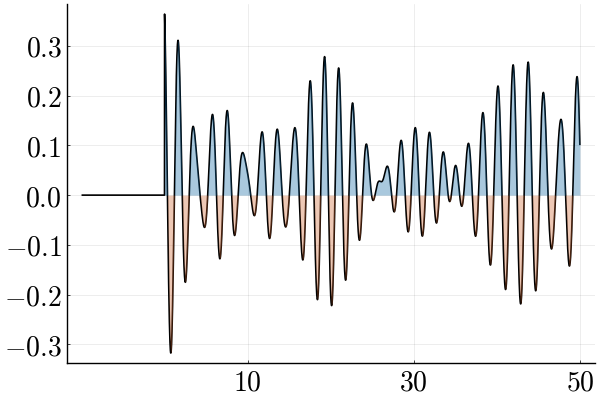

In [64]:
start = 19000
final = 25000

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur[start:final], linewidth=1.2, label=false, color="black", xlabelfontsize=30, ylabelfontsize=30,
    xtickfontsize=20, ytickfontsize=20, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs)
plot!(ts[start:final], poscur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#09629e", label=false)
plot!(ts[start:final], negcur[start:final], fillrange =  zeros(Float64, length(cur[start:final])),
    linewidth=0.0, fillalpha = 0.35, c = 1, fillcolor="#ce632d", label=false)

In [65]:
Plots.savefig("images/dynamics_example3/obs_f.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_f.png"

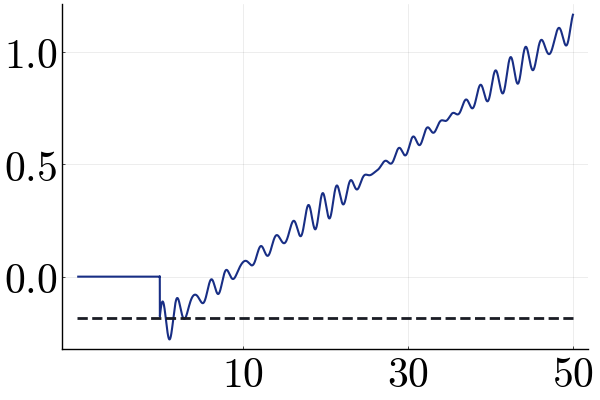

In [66]:
start = 19000
final = 25000
ylabs = ([0.0, 0.5, 1.0],[L"0.0",L"0.5",L"1.0"])

poscur = [cur[i]>=0 ? cur[i] : 0.0 for i in 1:length(cur)]
negcur = [cur[i]<=0 ? cur[i] : 0.0 for i in 1:length(cur)]


plot(ts[start:final], cur_int_tot[start:final], linewidth=1.5, label=false, color=cplot, xlabelfontsize=40, ylabelfontsize=40,
    xtickfontsize=30, ytickfontsize=30, legend=:topleft, legendfontsize=15, fontfamily="cm", xticks=xlabs, yticks=ylabs)
plot!([ts[start], ts[final]], [Qexp, Qexp], linewidth=2.0, label=false, color=cmeas, linestyle=:dash)

In [67]:
Plots.savefig("images/dynamics_example3/obs_f_integrated.png")

"/home/luka/Code/Github portfolio/QuantumRatchet/images/dynamics_example3/obs_f_integrated.png"